<a href="https://colab.research.google.com/github/aliakbarbadri/dogs-cats-classification/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the data
https://www.tensorflow.org/tutorials/images/classification

https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

https://www.tensorflow.org/tutorials/images/transfer_learning

In [2]:
(raw_train, raw_valid, raw_test), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:60%]', 'train[60%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteKI1ATX/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


{'0': 'cat', '1': 'dog'}

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


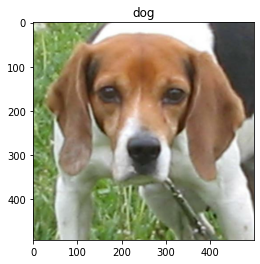

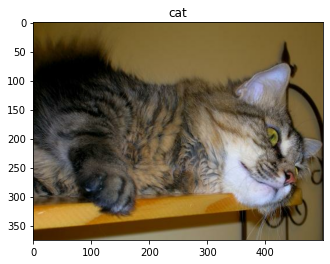

In [3]:
get_label_name = info.features['label'].int2str
print({
    '0':get_label_name(0),
    '1':get_label_name(1)
    })
print()
for image, label in raw_train.skip(2).take(2):
  print(type(image),type(label))
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [0]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
raw_small = raw_train.take(5)
small = raw_train.map(format_example)

In [0]:
train = raw_train.map(format_example)
valid = raw_valid.map(format_example)
test = raw_test.map(format_example)

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
valid_batches = valid.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=IMG_SHAPE))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [10]:
model.fit(train_batches,epochs=10, validation_data=valid_batches)

Epoch 1/10
437/437 [==============================] - 39s 88ms/step - loss: 0.6539 - accuracy: 0.5991 - val_loss: 0.5757 - val_accuracy: 0.7077
Epoch 2/10
437/437 [==============================] - 38s 88ms/step - loss: 0.5601 - accuracy: 0.7009 - val_loss: 0.5289 - val_accuracy: 0.7464
Epoch 3/10
437/437 [==============================] - 38s 87ms/step - loss: 0.5083 - accuracy: 0.7401 - val_loss: 0.5167 - val_accuracy: 0.7527
Epoch 4/10
437/437 [==============================] - 38s 87ms/step - loss: 0.4716 - accuracy: 0.7616 - val_loss: 0.5385 - val_accuracy: 0.7427
Epoch 5/10
437/437 [==============================] - 38s 87ms/step - loss: 0.4491 - accuracy: 0.7719 - val_loss: 0.5154 - val_accuracy: 0.7712
Epoch 6/10
437/437 [==============================] - 38s 87ms/step - loss: 0.4334 - accuracy: 0.7868 - val_loss: 0.5276 - val_accuracy: 0.7815
Epoch 7/10
437/437 [==============================] - 38s 88ms/step - loss: 0.4155 - accuracy: 0.7943 - val_loss: 0.5240 - val_accuracy:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 158, 158, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 77, 77, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46208)             0